In [34]:
# Importations of the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [35]:

# Load the CSV file
data = pd.read_csv("Heart Disease data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# values missing

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Summary Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.0

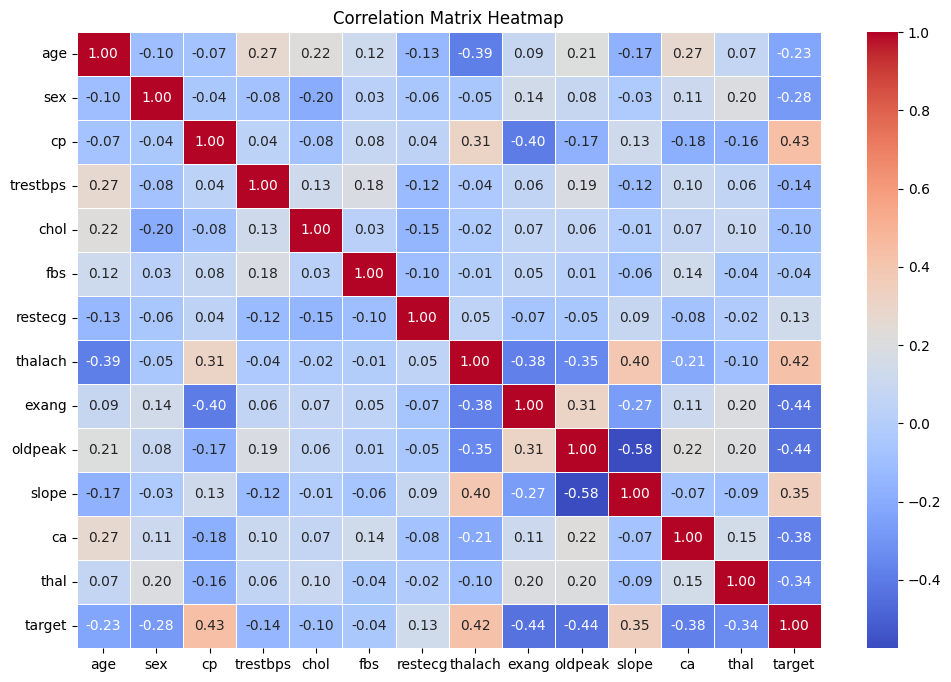

In [36]:

heart_data = data
summary_statistics = heart_data.describe()
print("Summary Statistics:")
print(summary_statistics)

categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
frequency_counts = {}
for variable in categorical_variables:
    frequency_counts[variable] = heart_data[variable].value_counts()
print("\nFrequency Counts for Categorical Variables:")
for variable, counts in frequency_counts.items():
    print("\n", variable, ":\n", counts)

# Correlation Analysis
correlation_matrix = heart_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Correlation with target variable
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (presence of heart disease):")
print(correlation_with_target)

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


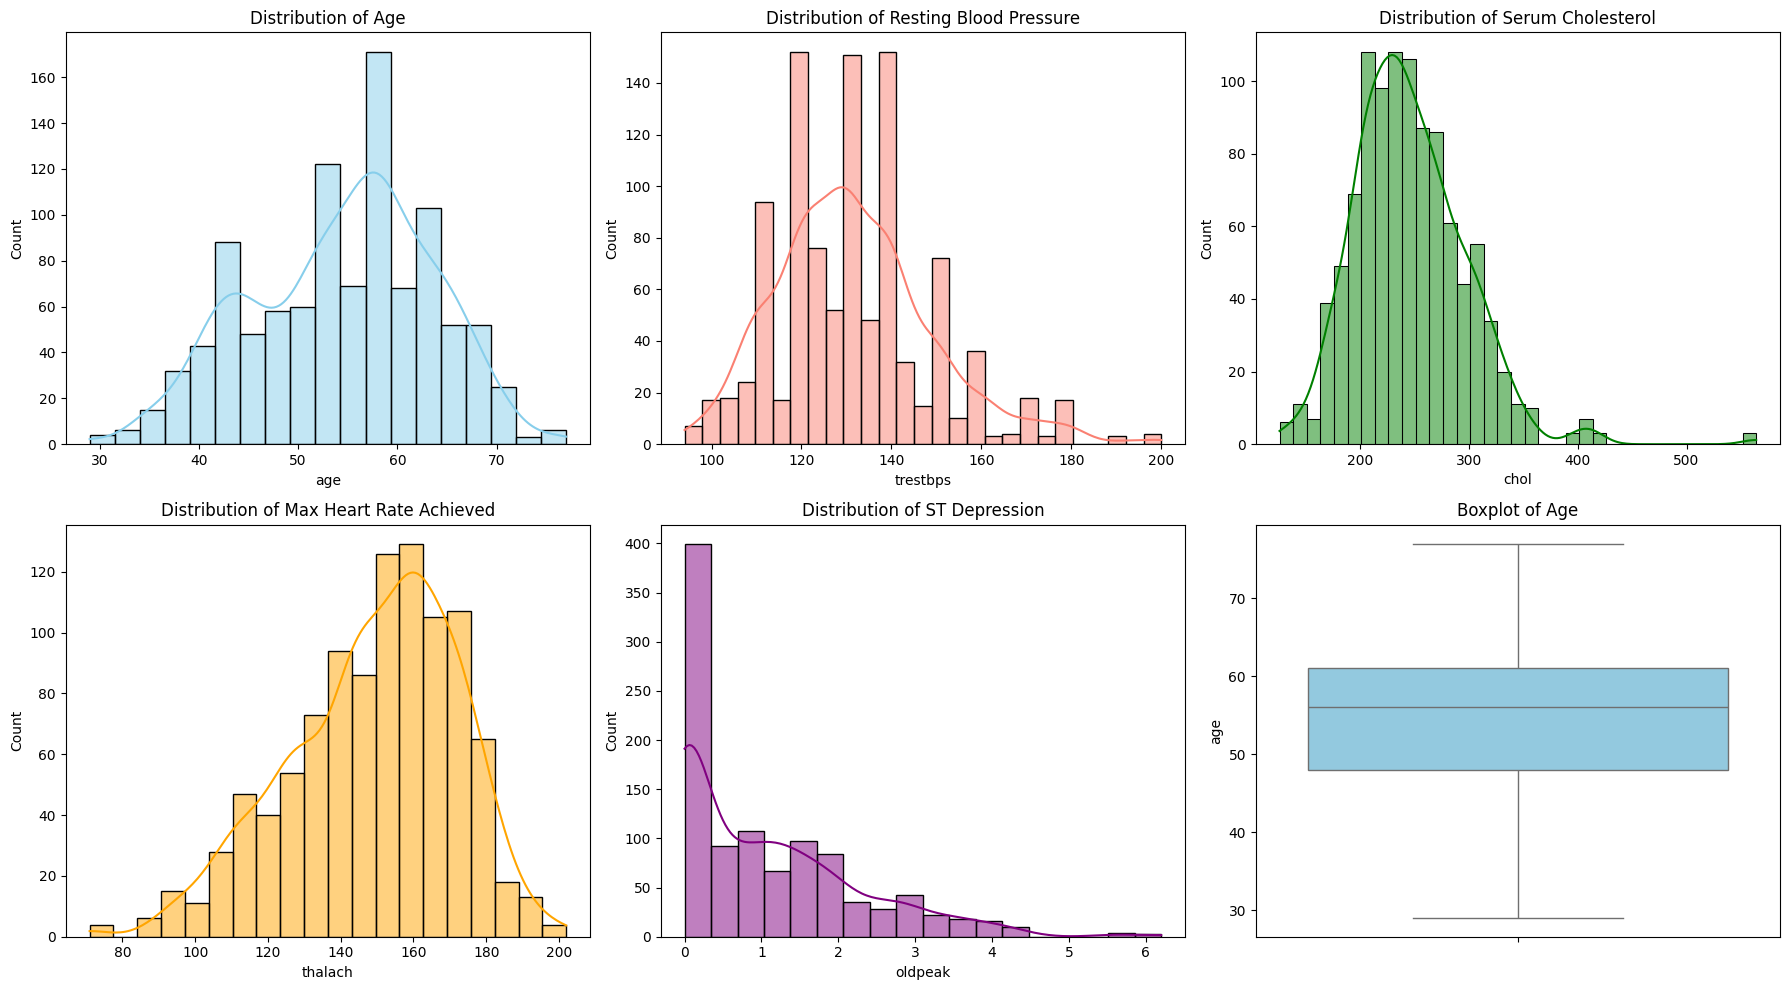

C:\Users\kavya\AppData\Local\Temp\ipykernel_9984\701747976.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=heart_data, ax=axes[0, 0], palette='pastel')
C:\Users\kavya\AppData\Local\Temp\ipykernel_9984\701747976.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=heart_data, ax=axes[0, 1], palette='pastel')
C:\Users\kavya\AppData\Local\Temp\ipykernel_9984\701747976.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs', data=heart_data, ax=axes[1, 0], palette='pastel')
C:\Users\kavya\AppData\Local\

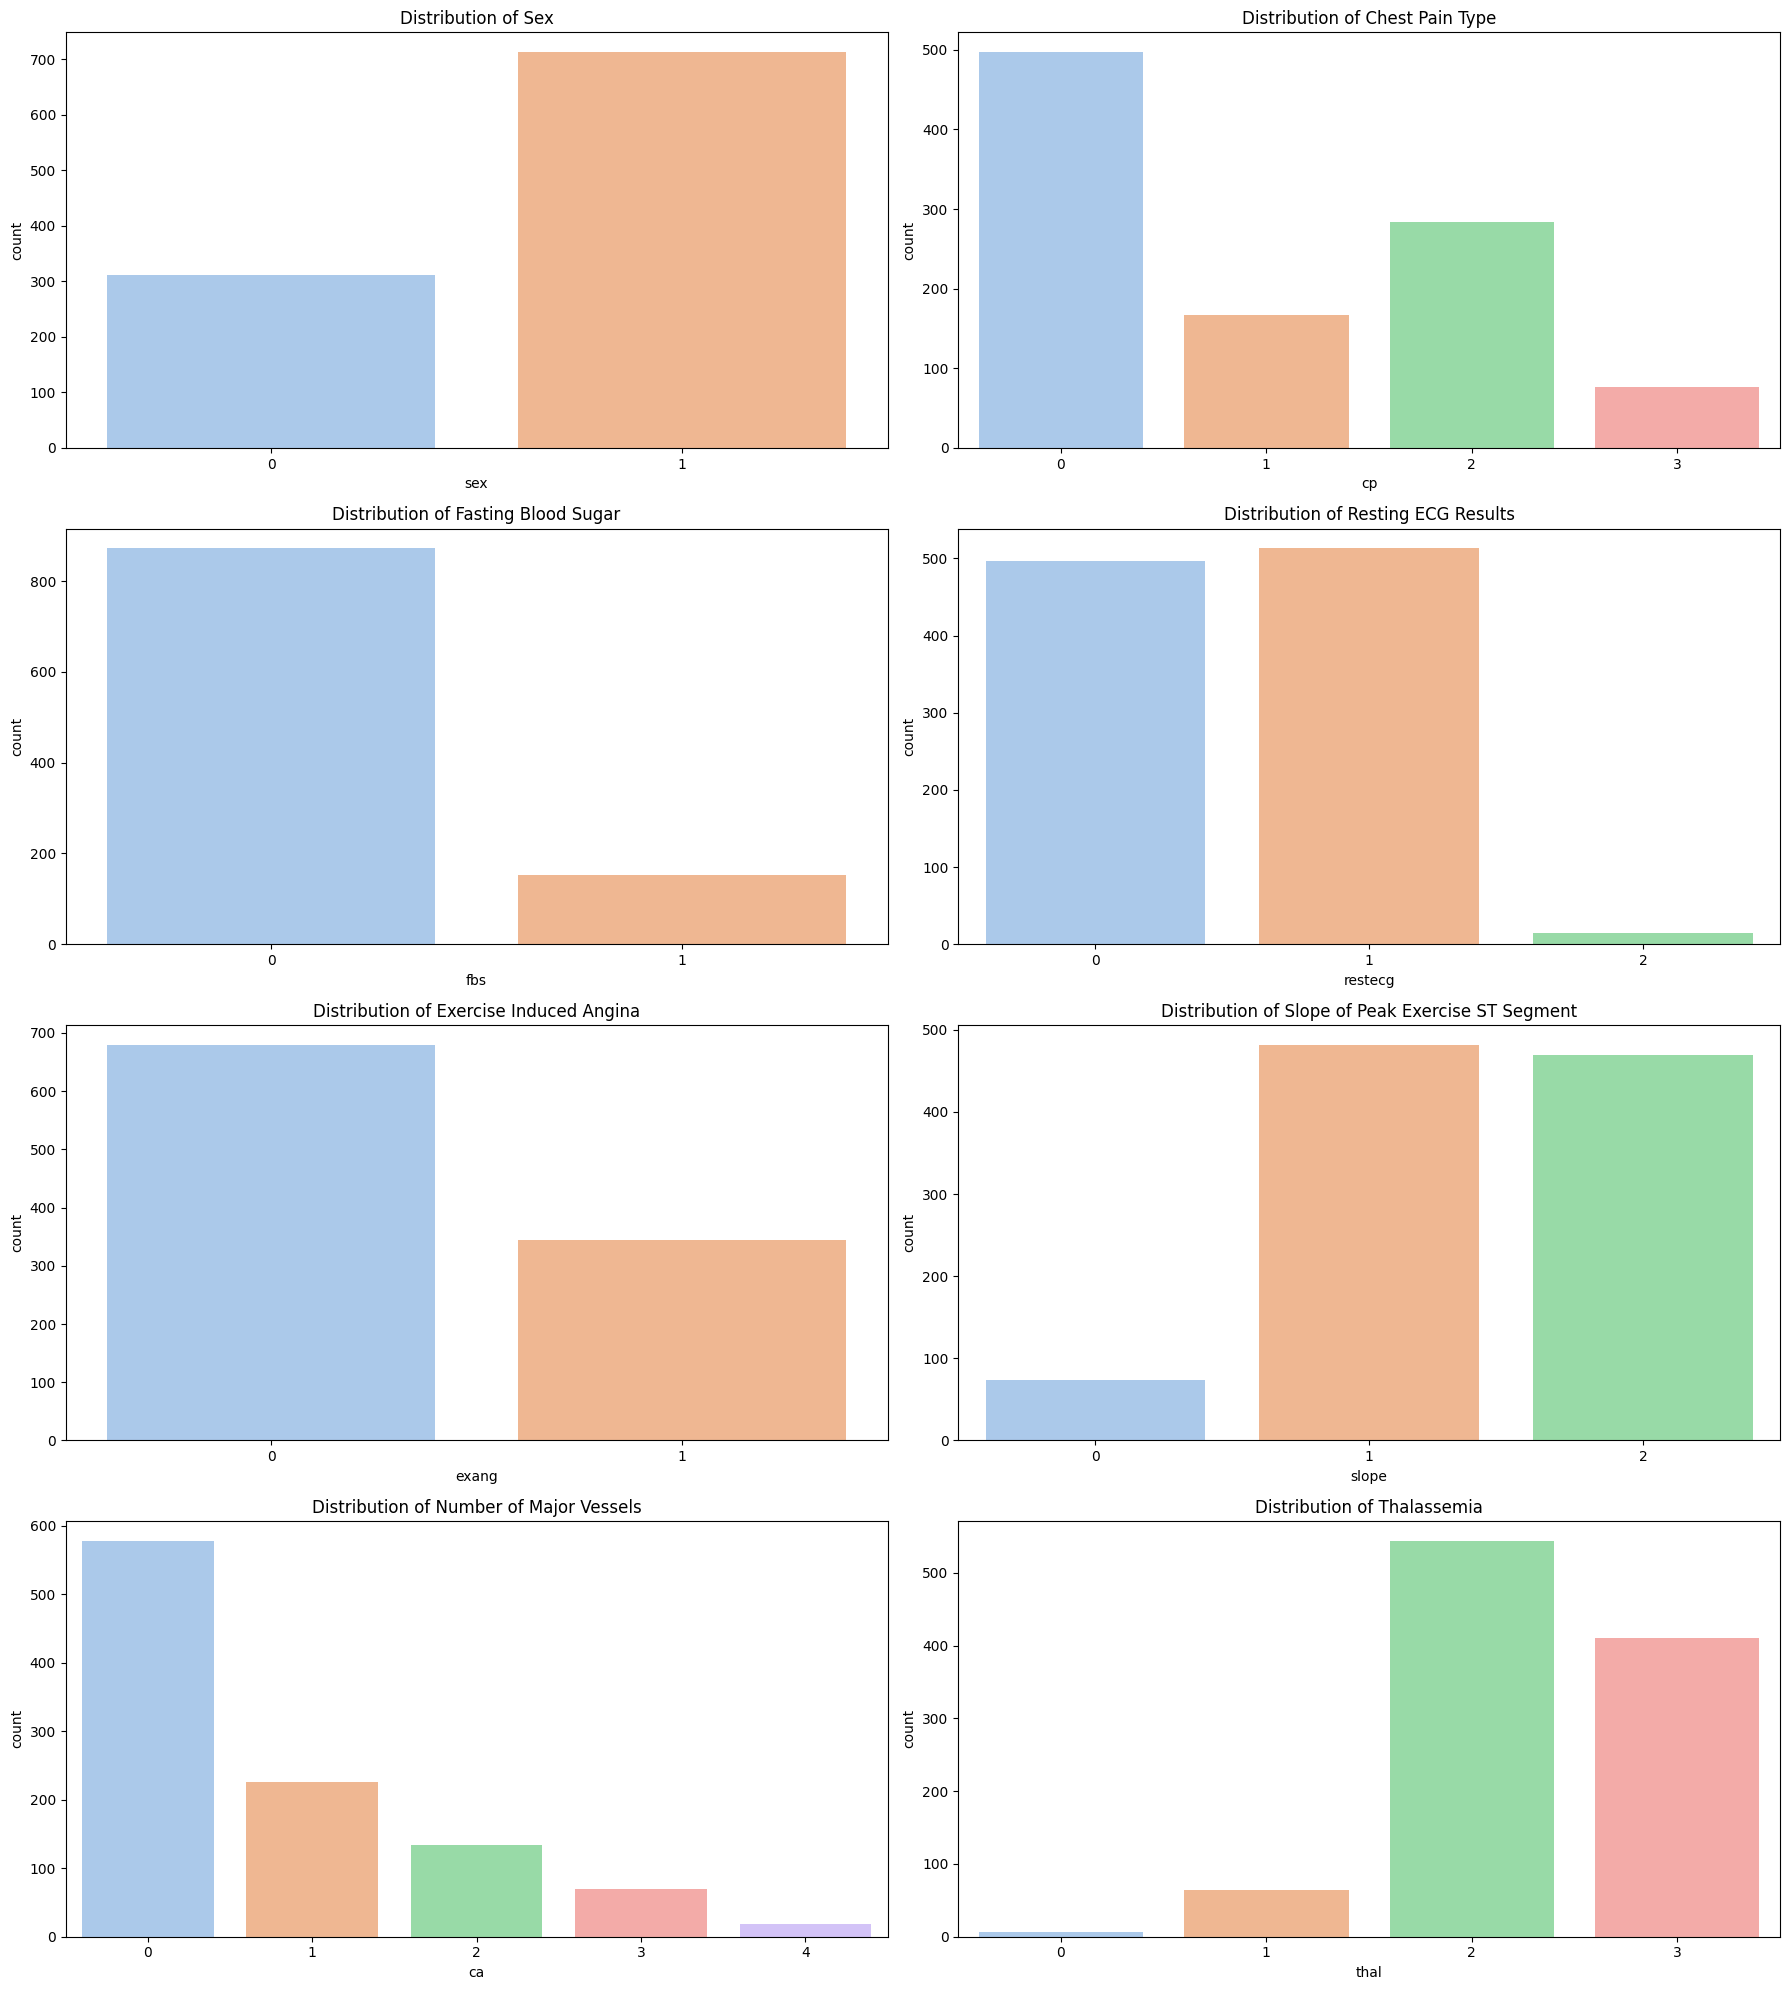

In [37]:
# subplots for numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograms for numerical features
sns.histplot(heart_data['age'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(heart_data['trestbps'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Distribution of Resting Blood Pressure')

sns.histplot(heart_data['chol'], ax=axes[0, 2], kde=True, color='green')
axes[0, 2].set_title('Distribution of Serum Cholesterol')

sns.histplot(heart_data['thalach'], ax=axes[1, 0], kde=True, color='orange')
axes[1, 0].set_title('Distribution of Max Heart Rate Achieved')

sns.histplot(heart_data['oldpeak'], ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribution of ST Depression')

# Boxplots for numerical features
sns.boxplot(y=heart_data['age'], ax=axes[1, 2], color='skyblue')
axes[1, 2].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

# subplots for categorical features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))

# Bar plots for categorical features
sns.countplot(x='sex', data=heart_data, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution of Sex')

sns.countplot(x='cp', data=heart_data, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution of Chest Pain Type')

sns.countplot(x='fbs', data=heart_data, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribution of Fasting Blood Sugar')

sns.countplot(x='restecg', data=heart_data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribution of Resting ECG Results')

sns.countplot(x='exang', data=heart_data, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Distribution of Exercise Induced Angina')

sns.countplot(x='slope', data=heart_data, ax=axes[2, 1], palette='pastel')
axes[2, 1].set_title('Distribution of Slope of Peak Exercise ST Segment')

sns.countplot(x='ca', data=heart_data, ax=axes[3, 0], palette='pastel')
axes[3, 0].set_title('Distribution of Number of Major Vessels')

sns.countplot(x='thal', data=heart_data, ax=axes[3, 1], palette='pastel')
axes[3, 1].set_title('Distribution of Thalassemia')

plt.tight_layout()
plt.show()


C:\Users\kavya\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


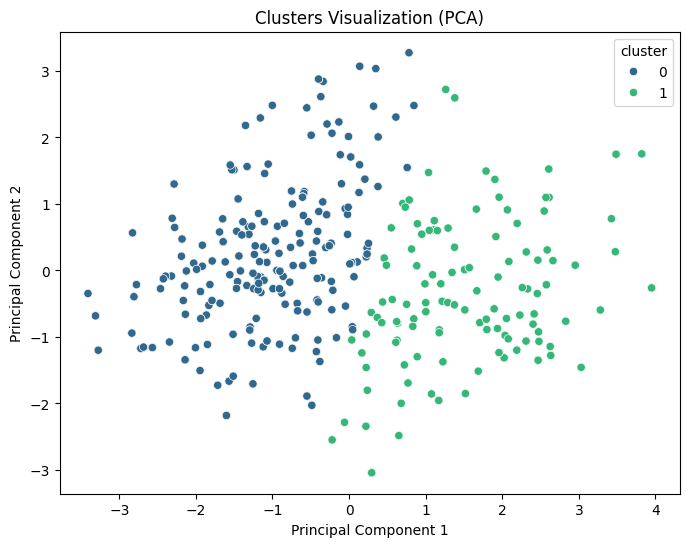

In [38]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[num_cols] = scaler.fit_transform(heart_data[num_cols])

# Clustering

# K-means clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(heart_data)

# Assign clusters to each sample
clusters = kmeans.predict(heart_data)

heart_data['cluster'] = clusters

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(heart_data.drop('cluster', axis=1)) 
heart_data['pca1'] = pca_result[:, 0]
heart_data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=heart_data, palette='viridis', legend='full')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
